In [46]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Import the numpy and pandas library
import numpy as np
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Importing data to the python environment

In [47]:
housing = pd.DataFrame(pd.read_csv(r"C:\Users\vargh\OneDrive\Desktop\PGA02\Property Price Prediction\Housing.csv"))

### Understanding data

In [48]:
# Check the head of the dataset
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [49]:
# Check the last five rows of the dataset
housing.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


### Data Inspection

In [50]:
housing.shape

(545, 13)

In [51]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [52]:
housing.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


### Data cleaning

In [53]:
# Checking Null values
housing.isnull().sum()*100/housing.shape[0]

# There are no null values in the dataset, hence it is clean.

price               0.0
area                0.0
bedrooms            0.0
bathrooms           0.0
stories             0.0
mainroad            0.0
guestroom           0.0
basement            0.0
hotwaterheating     0.0
airconditioning     0.0
parking             0.0
prefarea            0.0
furnishingstatus    0.0
dtype: float64

### Outlier Analysis

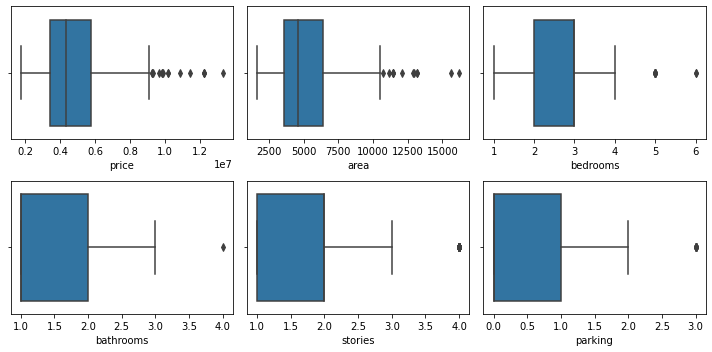

In [54]:
fig,axs = plt.subplots(2,3,figsize=(10,5))
plt1 = sns.boxplot(housing['price'],ax = axs[0,0])
plt2 = sns.boxplot(housing['area'],ax = axs[0,1])
plt3 = sns.boxplot(housing['bedrooms'],ax = axs[0,2])
plt1 = sns.boxplot(housing['bathrooms'],ax = axs[1,0])
plt2 = sns.boxplot(housing['stories'],ax = axs[1,1])
plt3 = sns.boxplot(housing['parking'],ax = axs[1,2])

plt.tight_layout()

-- subplots() function in the matplotlib library, helps in creating multiple layouts of subplots.It provides control over all the individual plots that are created.

-- Boxplots are a measure of how well distributed the data in a data set is. It divides the data set into three quartiles. This graph represents the minimum, maximum, median, first quartile and third quartile in the data set.

-- tight_layout() automatically adjusts subplot params so that the subplot(s) fits in to the figure area. This is an experimental feature and may not work for some cases.


### Outlier Treatment

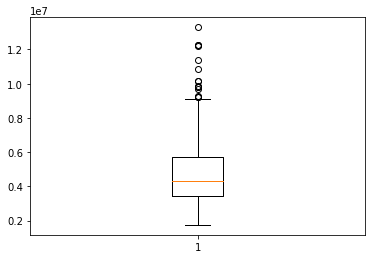

In [55]:
# Outlier treatment for price
plt.boxplot(housing.price)
Q1 = housing.price.quantile(0.25)
Q3 = housing.price.quantile(0.75)
IQR = Q3 - Q1
housing = housing[(housing.price >= Q1 - 1.5*IQR) & 
                  (housing.price <= Q3 + 1.5*IQR)]

In [56]:
housing.shape
# 15 rows have been deleted

(530, 13)

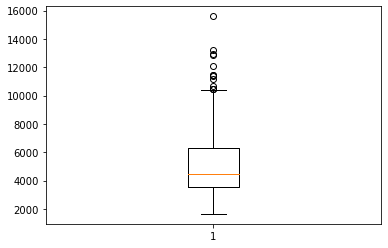

In [57]:
# Outlier treatment for area
plt.boxplot(housing.area)
Q1 = housing.area.quantile(0.25)
Q3 = housing.area.quantile(0.75)
IQR = Q3 - Q1
housing = housing[(housing.area >= Q1 - 1.5*IQR) & 
                  (housing.area <= Q3 + 1.5*IQR)]

In [58]:
housing.shape
# 13 rows have been deleted

(517, 13)

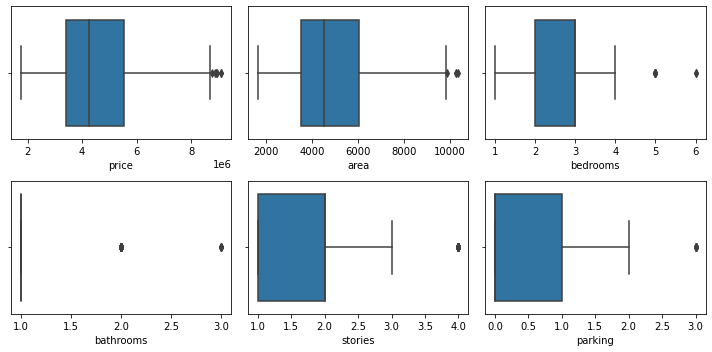

In [59]:
# Outlier Analysis
fig,axs = plt.subplots(2,3,figsize=(10,5))
plt1 = sns.boxplot(housing['price'],ax = axs[0,0])
plt2 = sns.boxplot(housing['area'],ax = axs[0,1])
plt3 = sns.boxplot(housing['bedrooms'],ax = axs[0,2])
plt1 = sns.boxplot(housing['bathrooms'],ax = axs[1,0])
plt2 = sns.boxplot(housing['stories'],ax = axs[1,1])
plt3 = sns.boxplot(housing['parking'],ax = axs[1,2])

plt.tight_layout()

### Exploratory Data Analysis

-- Understanding the data.
If there is some obvious multicollinearity going 

--A pairplot plot a pairwise relationships in a dataset. 

--The pairplot function creates a grid of Axes such that each variable in data will be shared in the y-axis across a single row and in the x-axis across a single column.

-- A pairplot allows us to see both distribution of single variables and relationships between two variables. The default pairs plot in seaborn only plots numerical columns

--The pairs plot builds on two basic figures, the histogram and the scatter plot. The histogram on the diagonal allows us to see the distribution of a single variable while the scatter plots on the upper and lower triangles show the relationship (or lack thereof) between two variables.

sns.pairplot(housing)
plt.show()

### Visualizing Categorical Variables

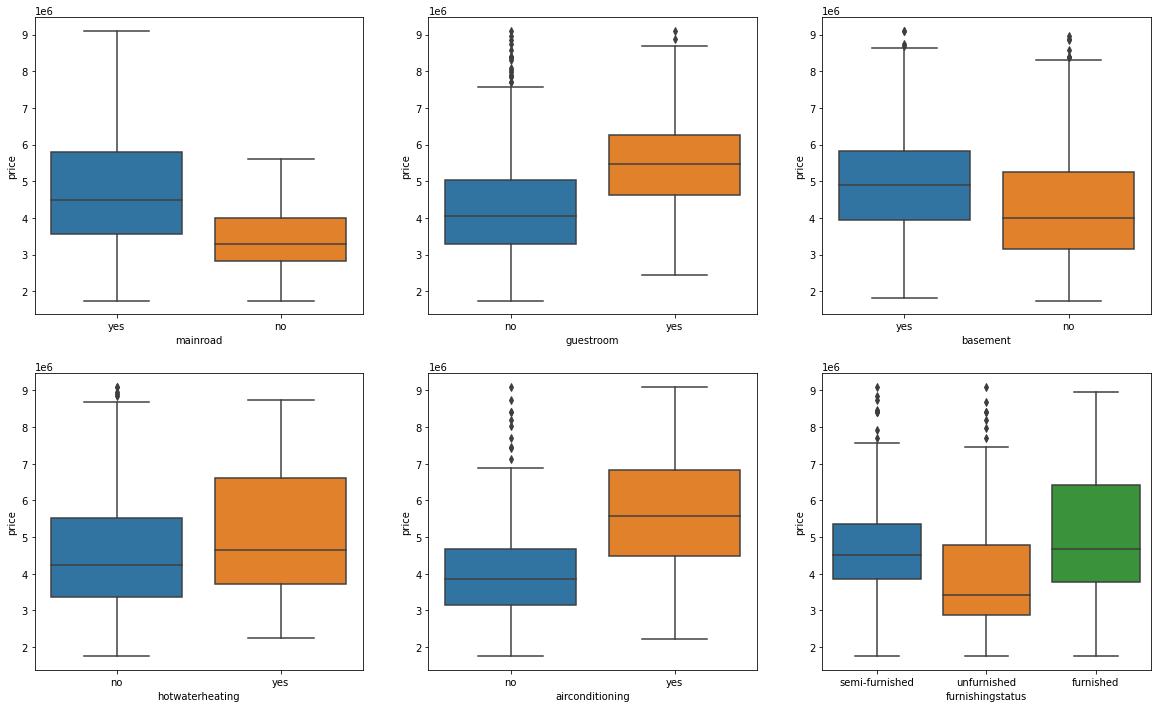

In [60]:
# Create boxplot for the categorical variables
plt.figure(figsize = (20,12))
plt.subplot(2,3,1)
sns.boxplot(x = 'mainroad', y = 'price', data = housing)
plt.subplot(2,3,2)
sns.boxplot(x = 'guestroom', y = 'price', data = housing)
plt.subplot(2,3,3)
sns.boxplot(x = 'basement', y = 'price', data = housing)
plt.subplot(2,3,4)
sns.boxplot(x = 'hotwaterheating', y = 'price', data = housing)
plt.subplot(2,3,5)
sns.boxplot(x = 'airconditioning', y = 'price', data = housing)
plt.subplot(2,3,6)
sns.boxplot(x = 'furnishingstatus', y = 'price', data = housing)
plt.show()

-- We can also visualise some of these categorical features parallely by using the hue argument. Below is the plot for furnishingstatus with airconditioning as the hue.

-- hue - When you use the hue parameter, you'll provide a categorical variable. When you pass a categorical variable to hue , sns. boxplot will create separate boxes for the different categories, and will color those boxes a different “hue"

<function matplotlib.pyplot.show(close=None, block=None)>

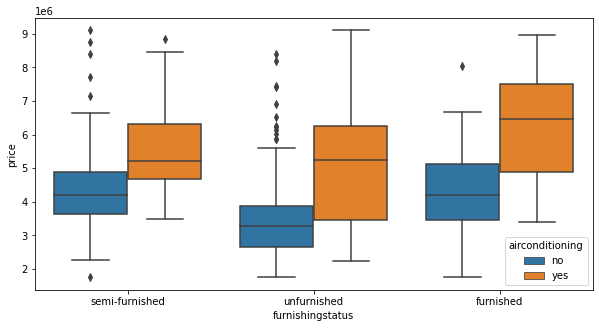

In [61]:
plt.figure(figsize = (10,5))
sns.boxplot(x = 'furnishingstatus', y = 'price', 
            hue = 'airconditioning', data = housing)
plt.show

### Data Preparation

-- You can see that the dataset has many columns with values as 'Yes' or 'No'.

-- But in order to fit a regression line, we would need numerical values and not string. Hence, we need to convert them to 1s and 0s, where 1 is a 'Yes' and 0 is a 'No'.

In [62]:
# List of variables to map
varlist = ['mainroad','guestroom','basement',
           'hotwaterheating','airconditioning','prefarea']

# Defining the map function
def binary_map(x):
    return x.map({'yes':1,'no':0})

# Applying the function to the housing list
housing[varlist] = housing[varlist].apply(binary_map)

In [63]:
# Check the housing dataframe now
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,semi-furnished
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,unfurnished
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,furnished
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,furnished
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,semi-furnished


-- Dummy Variables: 
The variable furnishingstatus has three levels. We need to convert these levels into integer as well.For this, we will use something called dummy variables.

-- get_dummies() used for data manipulation. It converts the categorical data into dummy or indicator variables

In [64]:
# Get the dummy variable for the feature 'furnishingstatus'
# and store it in the new variable - 'status'
status = pd.get_dummies(housing['furnishingstatus'])
# check the status
status.head()

,furnished,semi-furnished,unfurnished
15,0,1,0
16,0,0,1
17,1,0,0
18,1,0,0
19,0,1,0


##### Now, you don't need three columns. You can drop the furnished column, as the type of furnishing can be identified with just the last two columns where —
##### 00 will correspond to furnished
##### 01 will correspond to unfurnished
##### 10 will correspond to semi-furnished


In [65]:
# Drop the first column from status df using
# 'drop_first = True'
status = pd.get_dummies(housing['furnishingstatus'],
                       drop_first = True)

# Add the results to the original housing dataframe
housing = pd.concat([housing,status],axis = 1)

# Check housing df
housing.head()

# axis = 1 indicates column concatenation

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,semi-furnished,1,0
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,unfurnished,0,1
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,furnished,0,0
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,furnished,0,0
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,semi-furnished,1,0


In [66]:
# drop 'furnishingstatus' as we have 
# created the dummies for it

housing.drop(['furnishingstatus'],axis = 1, inplace = True)
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,1,0
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,0,1
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,0,0
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,0,0
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,1,0


##### When inplace = True , the data is modified in place, which means it will return nothing and the dataframe is now updated. When inplace = False , which is the default, then the operation is performed and it returns a copy of the object. You then need to save it to something.


In [70]:
# Splitting the data into Training and Testing sets
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set 
# always have the same rows respectively
np.random.seed(0)
df_train, df_test = train_test_split(housing,
                                    train_size = 0.7,
                                   test_size=0.3,
                                     random_state = 100)

##### This is to check and validate the data when running the code multiple times. Setting random_state a fixed value will guarantee that same sequence of random numbers are generated each time you run the code


In [ ]:
#Rescaling the Features
#Here we can see that except for area, all the columns have small integer values. So, it is extremely
#important to rescale the variables so that they have a comparable scale. If we don't have comparable
#scales, then some of the coefficients as obtained by fitting the regression model might be very large
#or very small as compared to the other coefficients. This might become very annoying at the time of
#model evaluation. So, it is advised to use standardization or normalization so that the units of the
#coefficients obtained are all on the same scale. There are two common ways of rescaling:
#1.Min-Max scaling
#2.Standardization (mean-0, sigma-1)
#We will use MinMax scaling.

In [71]:
from sklearn.preprocessing import MinMaxScaler

#MinMaxScaler. For each value in a feature, MinMaxScaler subtracts the minimum value in the feature
#and then divides by the range. The range is the difference between the original maximum and original
#minimum. MinMaxScaler preserves the shape of the original distribution.
scaler = MinMaxScaler()

# Apply scaler() to all the columns except the 'yes-no' and 
# 'dummy' variables
num_vars = ['area','bedrooms','bathrooms','stories',
            'parking','price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
148,0.523810,0.526907,0.4,0.0,0.666667,1,0,0,0,0,0.000000,1,1,0
236,0.390476,0.114134,0.2,0.0,0.333333,1,1,1,0,0,0.000000,1,1,0
356,0.275238,0.072738,0.8,0.5,0.000000,0,0,1,0,1,0.333333,0,0,0
425,0.219048,0.151390,0.2,0.0,0.000000,1,0,1,0,0,0.666667,0,0,0
516,0.095238,0.157895,0.2,0.0,0.000000,0,1,0,0,0,0.333333,0,0,1


In [72]:
df_train.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
count,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000
mean,0.383701,0.350081,0.390582,0.127424,0.268698,0.875346,0.168975,0.349030,0.038781,0.313019,0.218837,0.207756,0.476454,0.304709
std,0.209712,0.207184,0.149146,0.224465,0.287833,0.330784,0.375250,0.477325,0.193341,0.464366,0.287286,0.406264,0.500138,0.460923
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.237143,0.189829,0.200000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.338095,0.295092,0.400000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.514286,0.491425,0.400000,0.000000,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.333333,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


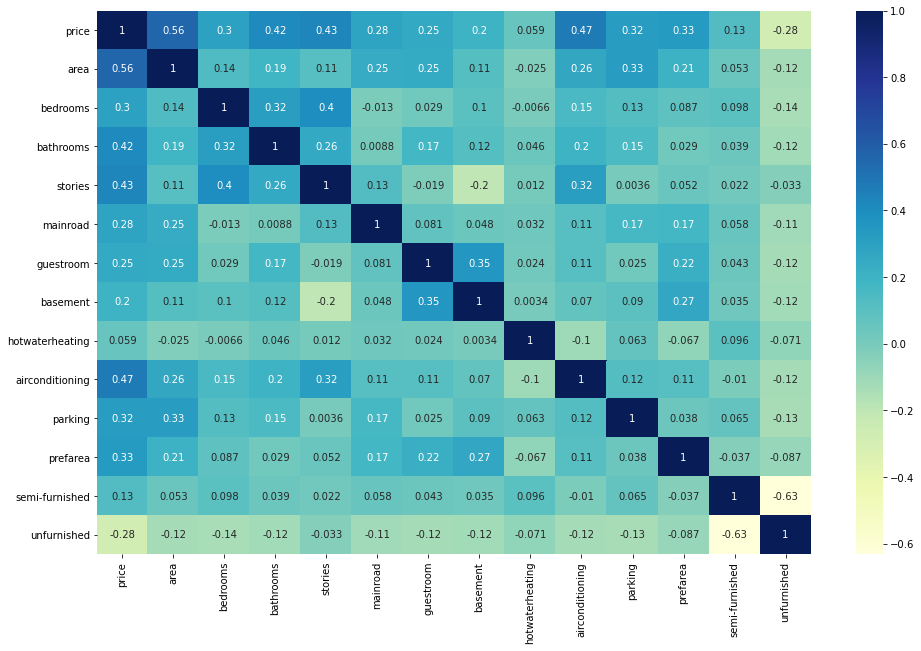

In [73]:
# Let's check the correlation coefficients to see which 
# variables are highly correlated

plt.figure(figsize=(16,10))
sns.heatmap(df_train.corr(), annot = True, cmap = 'YlGnBu')
plt.show()

# As you might have noticed, area seems to the correlated
# to price the most.

##### A heatmap is a two-dimensional graphical representation of data where the individual values that are contained in a matrix are represented as colors

##### A heatmap contains values representing various shades of the same colour for each value to be plotted. Usually the darker shades of the chart represent higher values than the lighter shade

##### annot: If True, write the data value in each cell.
##### cmap: The mapping from data values to color space.

In [74]:
# Dividing into X and Y sets for model building
y_train = df_train.pop('price')
x_train = df_train

In [78]:
# dependent features
y_train.head()

148    0.523810
236    0.390476
356    0.275238
425    0.219048
516    0.095238
Name: price, dtype: float64

In [77]:
# Independent feautres
x_train.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
148,0.526907,0.4,0.0,0.666667,1,0,0,0,0,0.000000,1,1,0
236,0.114134,0.2,0.0,0.333333,1,1,1,0,0,0.000000,1,1,0
356,0.072738,0.8,0.5,0.000000,0,0,1,0,1,0.333333,0,0,0
425,0.151390,0.2,0.0,0.000000,1,0,1,0,0,0.666667,0,0,0
516,0.157895,0.2,0.0,0.000000,0,1,0,0,0,0.333333,0,0,1


### Model Building

##### We will be using the LinearRegression function from SciKit learn for its compatibility with RFE(which is a utility from sklearn)

In [79]:
# RFE - Recursion Feature Elimination
# Importing RFE and Linear Regression

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

##### Recursive Feature Elimination, or RFE for short, is a popular feature selection algorithm.
##### RFE is popular because it is easy to configure and use and because it is effective at selecting those features (columns) in a training dataset that are more or most relevant in predicting the target variable.

In [80]:
# Running RFE with the output number of the variable 
# equal to 6

rfe = RFE(lm,6)     # Running RFE
rfe = rfe.fit(x_train,y_train)

In [81]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

# support_ - an array that indicates whether or not a 
# feature was selected

# ranking_ - the ranking of the features

[('area', True, 1),
 ('bedrooms', False, 7),
 ('bathrooms', True, 1),
 ('stories', True, 1),
 ('mainroad', False, 5),
 ('guestroom', False, 6),
 ('basement', False, 4),
 ('hotwaterheating', False, 2),
 ('airconditioning', True, 1),
 ('parking', True, 1),
 ('prefarea', True, 1),
 ('semi-furnished', False, 8),
 ('unfurnished', False, 3)]

In [82]:
col = x_train.columns[rfe.support_]    # Variables True
col

Index(['area', 'bathrooms', 'stories', 'airconditioning', 'parking',
       'prefarea'],
      dtype='object')

In [83]:
x_train.columns[~rfe.support_]         # Variables False

Index(['bedrooms', 'mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'semi-furnished', 'unfurnished'],
      dtype='object')

In [84]:
# Building model using statsmodel, for the detailed 
# statistics

# Creating x_test dataframe with RFE selected variables
x_train_rfe = x_train[col]

In [85]:
# Adding a constant variable
import statsmodels.api as sm
x_train_rfe = sm.add_constant(x_train_rfe)

##### add_constant adds a constant column to input data set. By default, statsmodels fits a line passing through the origin, i.e. it doesn't fit an intercept.
##### Hence, you need to use the command 'add_constant' so that it also fits an intercept. The intercept (often labeled the constant) is the expected mean value of Y when all X=0. The slope indicates the steepness of a line and the intercept indicates the location where it intersects an axis. The slope and the intercept define the linear relationship between two variables, and can be used to estimate an average rate of change.

In [86]:
lm = sm.OLS(y_train,x_train_rfe).fit()

##### The simplest linear regression algorithm assumes that the relationship between an independent variable (x) and dependent variable (y) is of the following form: y = mx + c, which is the equation of a line.
##### In line with that, OLS is an estimator in which the values of m and c (from the above equation) are chosen in such a way as to minimize the sum of the squares of the differences between the observed dependent variable and predicted dependent variable. That’s why it’s named ordinary least squares.
##### Also, it should be noted that when the sum of the squares of the differences is minimum, the loss is also minimum—hence the prediction is better.

In [87]:
# Summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     92.83
Date:                Thu, 25 Nov 2021   Prob (F-statistic):           1.31e-69
Time:                        11:26:59   Log-Likelihood:                 222.77
No. Observations:                 361   AIC:                            -431.5
Df Residuals:                     354   BIC:                            -404.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1097      0.015     

In [89]:
# Calculate the VIF for the model
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [90]:
# VIF : Variation Inflation Factor is a measure of collinearity
# among predictor variables within a multiple regression

# A multiple regression is used when a person wants to test the 
# effect of multiple variables on a particular outcome
# Using VIF  helps to identify the severity of any
# multicollinearity issues so that the model can be adjusted.
 
vif = pd.DataFrame()
x = x_train_rfe
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by="VIF",ascending=False)
vif

# A VIF above indicates high correlation and is cause 
# for concern

,Features,VIF
0,const,4.51
1,area,1.24
4,airconditioning,1.20
3,stories,1.17
5,parking,1.14
2,bathrooms,1.12
6,prefarea,1.05


In [91]:
# Residual Analysis of the train data
# Check if the error terms are also normally distributed
#(which is infact, one of the major assumptions of
#linear regression), let us plot the histogram of the error 
#terms and see what it looks like.

y_train_price = lm.predict(x_train_rfe)

In [96]:
res = (y_train_price - y_train)
res

148    0.006175
236   -0.067819
356    0.090624
425    0.010939
516    0.103377
         ...   
255    0.033201
307    0.001273
72    -0.042434
377    0.165277
99    -0.099211
Length: 361, dtype: float64

In [93]:
# Plot the required libraries for the plot
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#%matplotlib inline sets the backend of matplotlib to the 'inline' backend: With this backend, the
#output of plotting commands is displayed inline within frontends like the Jupyter notebook, directly
#below the code cell that produced it.

Text(0.5, 0, 'Errors')

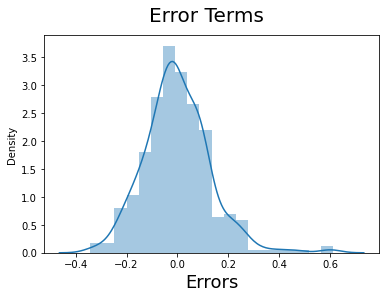

In [94]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle("Error Terms", fontsize=20)     # Plot heading
plt.xlabel("Errors", fontsize=18)            # x-label

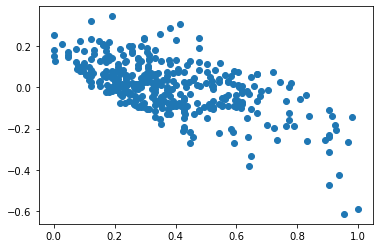

In [95]:
plt.scatter(y_train,res)
plt.show()

# There may be some relation in the error terms 

### Model Evaluation

In [97]:
# Applying the scaling on the test sets
num_vars = ['area','stories','bathrooms','airconditioning',
           'prefarea','parking','price']

In [98]:
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])
#fit_transform() is used on the training data so that we can scale the training data and also learn
#the scaling parameters of that data. Here, the model built by us will learn the mean and variance of
#the features of the training set. These learned parameters are then used to scale our test data

In [99]:
# Dividing into x-test and y_test
y_test = df_test.pop('price')
x_test = df_test

In [100]:
# Adding constant variable to test dataframe
x_test = sm.add_constant(x_test)

In [101]:
# Using our model to make predictions

# Creating x_test_new dataframe by dropping variables from 
# x_test

x_test_rfe = x_test[x_train_rfe.columns]

In [102]:
# Making Predictions
y_pred = lm.predict(x_test_rfe)

In [103]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.5791247774397739

Text(0, 0.5, 'y_pred')

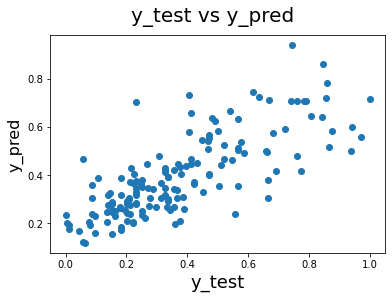

In [104]:
# Plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred',fontsize=20)   # Plot Heading
plt.xlabel('y_test',fontsize=18)               # x-label
plt.ylabel('y_pred',fontsize=16)               # y-label

In [ ]:
# We can see that the equation of our best fitted line is:
price = 0.35*area + 0.20*bathrooms + 0